In [542]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from tqdm import tqdm

### **Functions**

In [16]:
def clean_string_name(string):
    text = string.replace(' Size: 4 oz. * USDA Certified Organic Ingredient ** None remains after saponifying oils into soap and glycerin', '')
    pattern = "[\|\*\_\'\{}&]".format('"')
    regex1 = re.compile('\[.*]')
    regex2 = re.compile('\[.*}')
    text = re.sub(pattern, "", text)
    text = re.sub(regex1, "", text)
    text = re.sub(regex2, "", text)
    text = text.strip('\x0c')
    text = text.strip(' ')
    text = text.upper()
    text = text.replace('INACTIVE INGREDIENTS:', '')
    text = text.replace('ACTIVE INGREDIENTS:', '')

    return text

In [252]:
mismatch = ['CAVIAR WATER', 'STEM WATER']
def convert_new_ing_list(x):
    trimed = [name.strip(" '").strip("''") for name in x.strip('[]').split(',')]
    res = ''

    for i in range(len(trimed)):
        if i != (len(trimed) -1):
            if trimed[i] in mismatch:
                res = res + 'WATER' + ', '
            else:
                res = res + trimed[i] + ', '
        else: 
            if trimed[i] in mismatch:
                res = res + 'WATER' + ', '
            else:
                res = res + trimed[i]
    return res

In [197]:
# show full values of the column
# pd.set_option('display.max_colwidth', -1)

2020-10-18 16:14:23,272 [82247] WARNING  py.warnings:110: [JupyterRequire] /Users/macbookpro/miniconda3/envs/cs_ftmle/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  



### **Load dataset**
* Sun:
* Skin:
* Makeup:

In [253]:
df_skin = pd.read_csv('../Database/ewg_skin_products_transformed_8208.csv')
df_sun = pd.read_csv('../Database/ewg_sun_products_transformed_1565.csv')
df_makeup = pd.read_csv('../Database/ewg_makeup_done_processing_ced.csv')

In [256]:
# df_skin['new_ing_list_fixed'] = df_skin['new_ing_list'].apply(convert_new_ing_list)
# df_sun['new_ing_list_fixed'] = df_sun['new_ing_list'].apply(convert_new_ing_list)
# df_makeup['new_ing_list_fixed'] = df_makeup['new_ing_list'].apply(convert_new_ing_list)

In [170]:
# count = 0
# diff_dict = []
# for index, row in df_skin.iterrows():
#     d = {'ori_name': '',
#         'new_name': ''}
#     d = {}
#     ori_name = [name.strip() for name in clean_string_name(row['ingredient_list']).split(',')]
#     new_name = [name.strip() for name in clean_string_name(row['new_ing_list_fixed']).split(',')]
#     if len(ori_name) != len(new_name):
#         count += 1
#         d['ori_name'] = ori_name
#         d['new_name'] = new_name
#         diff_dict.append(d)
        

In [257]:
df_all = pd.concat([df_skin, df_sun, df_makeup])

In [276]:
df_all.shape

(20300, 10)

In [258]:
df_all['product_score'].value_counts()

03          4115
02          4101
04          3634
05          2747
01          2379
verified    1584
06          1170
07          403 
08          135 
10          20  
09          12  
Name: product_score, dtype: int64

In [280]:
df_all.drop_duplicates(inplace=True)

In [289]:
df_all['product_score'].value_counts()

03          4066
02          4060
04          3575
05          2720
01          2352
verified    1553
06          1163
07          402 
08          132 
10          20  
09          12  
Name: product_score, dtype: int64

In [290]:
df_all['new_product_score'] = df_all['product_score'].map({'verified': 1,
                                                          '01': 2,
                                                          '02': 3,
                                                          '03': 4,
                                                          '04': 5,
                                                          '05': 6,
                                                          '06': 7,
                                                          '07': 8,
                                                          '08': 9,
                                                          '09': 10,
                                                          '10': 10,})

In [292]:
df_all['new_product_score'].value_counts()

4     4066
3     4060
5     3575
6     2720
2     2352
1     1553
7     1163
8     402 
9     132 
10    32  
Name: new_product_score, dtype: int64

In [308]:
df_all

,cat_name,subcat_name,product_url,product_brand,product_name,product_score,product_img,ingredient_list,new_ing_list,new_ing_list_fixed,new_product_score
0,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701958-Soap_for_Goodness_Sake_Handmade_Soap_Olive_Oil_I/,Soap for Goodness Sake,"Handmade Soap, Olive Oil I",verified,https://static.ewg.org/skindeep_images/7019/701958.jpg,"Saponified Organic Extra Virgin Olive Oil (Sodium Olivate), Distilled Water, Cinnamomum Zeylanicum (Cinnamon) Leaf Oil,","['SODIUM PEG-7 OLIVE OIL CARBOXYLATE', 'STEM WATER', 'CINNAMOMUM ZEYLANICUM LEAF OIL']","SODIUM PEG-7 OLIVE OIL CARBOXYLATE, WATER, CINNAMOMUM ZEYLANICUM LEAF OIL",1
1,Skin,Bar Soap,https://www.ewg.org/skindeep/products/604412-Makes_3_Organics_Unscented_Super_Shea_Soap_Bar/,Makes 3 Organics,Unscented Super Shea Soap Bar,verified,https://static.ewg.org/skindeep_images/6044/604412.jpg,"Safflower* and/or Sunflower* Oils, Coconut* Oil, Palm Fruit* Oil, Shea Butter*, Water, Sodium Hydroxide**, Rosemary Extract. Size: 4 oz. * USDA Certified Organic Ingredient ** None remains after saponifying oils into soap and glycerin","['SAFFLOWER FLOWER', 'COCONUT ACID', 'PALM) FRUIT', 'SHEA BUTTERATE', 'WATER', 'SODIUM HYDROXIDE', 'ROSA EXTRACT']","SAFFLOWER FLOWER, COCONUT ACID, PALM) FRUIT, SHEA BUTTERATE, WATER, SODIUM HYDROXIDE, ROSA EXTRACT",1
2,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701974-Soap_for_Goodness_Sake_Handmade_Soap_Shea_and_Oats_/,Soap for Goodness Sake,"Handmade Soap, Shea and Oats",verified,https://static.ewg.org/skindeep_images/7019/701974.jpg,"Saponified Organic Sunflower Oil (Sodium Sunflower Seedate), Saponified Organic Palm Kernel Oil (Sodium Palm Kernelate), Saponified Organic Coconut Oil (Sodium Cocoate), Distilled Water, Butyrospermum Parkii (Shea Butter), Avena Sativa (Oat) Kernel Meal,","['POTASSIUM SUNFLOWERSEEDATE', 'SODIUM PALM KERNELOYL ISETHIONATE', 'PROPYLENE GLYCOL DICOCOATE', 'STEM WATER', 'BUTYROSPERMUM PARKII BUTTER', 'AVENA SATIVA KERNEL MEAL']","POTASSIUM SUNFLOWERSEEDATE, SODIUM PALM KERNELOYL ISETHIONATE, PROPYLENE GLYCOL DICOCOATE, WATER, BUTYROSPERMUM PARKII BUTTER, AVENA SATIVA KERNEL MEAL",1
3,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701929-Soap_for_Goodness_Sake_Handmade_Soap_Balancing_Act_/,Soap for Goodness Sake,"Handmade Soap, Balancing Act",verified,https://static.ewg.org/skindeep_images/7019/701929.jpg,"Saponified Organic Sunflower Oil (Sodium Sunflower Seedate), Saponified Organic Palm Kernel Oil (Sodium Palm Kernelate), Saponified Organic Coconut Oil (Sodium Cocoate), Distilled Water, Organic Simmondsia Chinensis (Jojoba), Organic Butyrospermum Parkii (Shea Butter), Avena Sativa (Oat) Kernel Meal, Natural Sea Salt (Sodium Chloride),","['POTASSIUM SUNFLOWERSEEDATE', 'SODIUM PALM KERNELOYL ISETHIONATE', 'PROPYLENE GLYCOL DICOCOATE', 'STEM WATER', 'SIMMONDSIA CHINENSIS BUTTER', 'BUTYROSPERMUM PARKII BUTTER', 'AVENA SATIVA KERNEL MEAL', 'LAURALKONIUM CHLORIDE']","POTASSIUM SUNFLOWERSEEDATE, SODIUM PALM KERNELOYL ISETHIONATE, PROPYLENE GLYCOL DICOCOATE, WATER, SIMMONDSIA CHINENSIS BUTTER, BUTYROSPERMUM PARKII BUTTER, AVENA SATIVA KERNEL MEAL, LAURALKONIUM CHLORIDE",1
4,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701942-Soap_for_Goodness_Sake_Shampoo__Body_Bar_French_Lavender_/,Soap for Goodness Sake,"Shampoo & Body Bar, French Lavender",verified,https://static.ewg.org/skindeep_images/7019/701942.jpg,"Saponified Expeller Pressed Babassu Oil (Orbignya Oleifera Oil), Saponified Organic Sunflower Oil (Sodium Sunflower Seedate), Distilled Water, Organic Simmondsia Chinensis (Jojoba), Lavandula Angustifolia (Lavender) Flower Essential Oil, Organic Avena Sativa (Oat) Kernel Meal, Cinnamomum Zeylanicum (Cinnamon) Leaf Oil,","['POTASSIUM SUNFLOWERSEEDATE', 'STEM WATER', 'SIMMONDSIA CHINENSIS BUTTER', 'LAVANDULA ANGUSTIFOLIA FLOWER OIL', 'AVENA SATIVA KERNEL MEAL', 'CINNAMOMUM ZEYLANICUM LEAF OIL']","POTASSIUM SUNFLOWERSEEDATE, WATER, SIMMONDSIA CHINENSIS BUTTER, LAVANDULA ANGUSTI

In [307]:
df_all.reset_index(drop=True, inplace=True)

### **Count common ingredients**

In [293]:
df_all['new_ing_list_fixed'].to_list()

['SODIUM PEG-7 OLIVE OIL CARBOXYLATE, WATER, CINNAMOMUM ZEYLANICUM LEAF OIL',
 'SAFFLOWER FLOWER, COCONUT ACID, PALM) FRUIT, SHEA BUTTERATE, WATER, SODIUM HYDROXIDE, ROSA EXTRACT',
 'POTASSIUM SUNFLOWERSEEDATE, SODIUM PALM KERNELOYL ISETHIONATE, PROPYLENE GLYCOL DICOCOATE, WATER, BUTYROSPERMUM PARKII BUTTER, AVENA SATIVA KERNEL MEAL',
 'POTASSIUM SUNFLOWERSEEDATE, SODIUM PALM KERNELOYL ISETHIONATE, PROPYLENE GLYCOL DICOCOATE, WATER, SIMMONDSIA CHINENSIS BUTTER, BUTYROSPERMUM PARKII BUTTER, AVENA SATIVA KERNEL MEAL, LAURALKONIUM CHLORIDE',
 'POTASSIUM SUNFLOWERSEEDATE, WATER, SIMMONDSIA CHINENSIS BUTTER, LAVANDULA ANGUSTIFOLIA FLOWER OIL, AVENA SATIVA KERNEL MEAL, CINNAMOMUM ZEYLANICUM LEAF OIL',
 'POTASSIUM SUNFLOWERSEEDATE, SODIUM PALM KERNELOYL ISETHIONATE, PROPYLENE GLYCOL DICOCOATE, WATER, BUTYROSPERMUM PARKII BUTTER, AVENA SATIVA KERNEL MEAL',
 'SODIUM PALM KERNELOYL ISETHIONATE, WATER, PRUNUS AMYGDALUS DULCIS SEED, PROPYLENE GLYCOL DICOCOATE, THEOBROMA CACAO SEED BUTTER, POLYAMIN

In [294]:
vocab = Counter()

for ing in df_all['new_ing_list_fixed']:
    for words in ing.split(', '):
        vocab[words] += 1
    

In [453]:
most_vocab = vocab.most_common()
common_vocab = pd.DataFrame(most_vocab, columns=['word', 'frequency'])

In [454]:
most_vocab

[('IRON OXIDES', 8488),
 ('PHENOXYETHANOL', 7453),
 ('WATER', 7091),
 ('GLYCERIN', 6844),
 ('TITANIUM DIOXIDE', 5921),
 ('SILICA', 5096),
 ('TOCOPHERYL ACETATE', 4891),
 ('TOCOPHEROL', 4515),
 ('DIMETHICONE', 4411),
 ('MICA', 4144),
 ('CI 77492', 3986),
 ('CI 77499', 3826),
 ('CAPRIC TRIGLYCERIDE', 3802),
 ('CAPRYLYL GLYCOL', 3656),
 ('ETHYLHEXYLGLYCERIN', 3320),
 ('CITRIC ACID', 3093),
 ('CI 15850', 2852),
 ('GRANITE', 2774),
 ('BUTYLENE GLYCOL', 2747),
 ('XANTHAN GUM', 2697),
 ('BUTYROSPERMUM PARKII BUTTER', 2661),
 ('SODIUM CHLORIDE', 2495),
 ('DISTEARDIMONIUM HECTORITE', 2429),
 ('CYCLOPENTASILOXANE', 2426),
 ('POTASSIUM SORBATE', 2316),
 ('DISODIUM EDTA', 2277),
 ('ISODODECANE', 2268),
 ('HELIANTHUS ANNUUS SEED OIL', 2145),
 ('SIMMONDSIA CHINENSIS SEED OIL', 2111),
 ('SODIUM HYALURONATE', 2088),
 ('POLYETHYLENE', 2034),
 ('YELLOW 11', 1979),
 ('TALC', 1972),
 ('TRIMETHYLSILOXYSILICATE', 1931),
 ('TIN OXIDE', 1917),
 ('COCOS NUCIFERA OIL', 1863),
 ('PROPYLENE CARBONATE', 1843),
 ('

In [455]:
most_vocab_dict = {ing[0]: idx for idx, ing in enumerate(most_vocab)}

In [456]:
most_vocab_dict

{'IRON OXIDES': 0,
 'PHENOXYETHANOL': 1,
 'WATER': 2,
 'GLYCERIN': 3,
 'TITANIUM DIOXIDE': 4,
 'SILICA': 5,
 'TOCOPHERYL ACETATE': 6,
 'TOCOPHEROL': 7,
 'DIMETHICONE': 8,
 'MICA': 9,
 'CI 77492': 10,
 'CI 77499': 11,
 'CAPRIC TRIGLYCERIDE': 12,
 'CAPRYLYL GLYCOL': 13,
 'ETHYLHEXYLGLYCERIN': 14,
 'CITRIC ACID': 15,
 'CI 15850': 16,
 'GRANITE': 17,
 'BUTYLENE GLYCOL': 18,
 'XANTHAN GUM': 19,
 'BUTYROSPERMUM PARKII BUTTER': 20,
 'SODIUM CHLORIDE': 21,
 'DISTEARDIMONIUM HECTORITE': 22,
 'CYCLOPENTASILOXANE': 23,
 'POTASSIUM SORBATE': 24,
 'DISODIUM EDTA': 25,
 'ISODODECANE': 26,
 'HELIANTHUS ANNUUS SEED OIL': 27,
 'SIMMONDSIA CHINENSIS SEED OIL': 28,
 'SODIUM HYALURONATE': 29,
 'POLYETHYLENE': 30,
 'YELLOW 11': 31,
 'TALC': 32,
 'TRIMETHYLSILOXYSILICATE': 33,
 'TIN OXIDE': 34,
 'COCOS NUCIFERA OIL': 35,
 'PROPYLENE CARBONATE': 36,
 'STEARIC ACID': 37,
 'ALOE BARBADENSIS LEAF JUICE': 38,
 'LIMONENE': 39,
 'SYNTHETIC FLUORPHLOGOPITE': 40,
 'ETHYLHEXYL PALMITATE': 41,
 'GLYCERYL STEARATE': 42

In [397]:
ingredient_order = common_vocab['word'].to_list()
len(ingredient_order)

7388

In [298]:
# df_all[df_all['new_ing_list_fixed'].str.contains("STEM WATER")]

### **Ingredient mapping**

In [424]:
corpus = []
for i in range(len(df_all)):
    ingredients = df_all['new_ing_list_fixed'][i]
#     print(ingredients)
    tokens = ingredients.split(', ')    
    corpus.append(tokens)

In [425]:
len(corpus)

20055

In [384]:
corpus

[['SODIUM PEG-7 OLIVE OIL CARBOXYLATE',
  'WATER',
  'CINNAMOMUM ZEYLANICUM LEAF OIL'],
 ['SAFFLOWER FLOWER',
  'COCONUT ACID',
  'PALM) FRUIT',
  'SHEA BUTTERATE',
  'WATER',
  'SODIUM HYDROXIDE',
  'ROSA EXTRACT'],
 ['POTASSIUM SUNFLOWERSEEDATE',
  'SODIUM PALM KERNELOYL ISETHIONATE',
  'PROPYLENE GLYCOL DICOCOATE',
  'WATER',
  'BUTYROSPERMUM PARKII BUTTER',
  'AVENA SATIVA KERNEL MEAL'],
 ['POTASSIUM SUNFLOWERSEEDATE',
  'SODIUM PALM KERNELOYL ISETHIONATE',
  'PROPYLENE GLYCOL DICOCOATE',
  'WATER',
  'SIMMONDSIA CHINENSIS BUTTER',
  'BUTYROSPERMUM PARKII BUTTER',
  'AVENA SATIVA KERNEL MEAL',
  'LAURALKONIUM CHLORIDE'],
 ['POTASSIUM SUNFLOWERSEEDATE',
  'WATER',
  'SIMMONDSIA CHINENSIS BUTTER',
  'LAVANDULA ANGUSTIFOLIA FLOWER OIL',
  'AVENA SATIVA KERNEL MEAL',
  'CINNAMOMUM ZEYLANICUM LEAF OIL'],
 ['POTASSIUM SUNFLOWERSEEDATE',
  'SODIUM PALM KERNELOYL ISETHIONATE',
  'PROPYLENE GLYCOL DICOCOATE',
  'WATER',
  'BUTYROSPERMUM PARKII BUTTER',
  'AVENA SATIVA KERNEL MEAL'],
 ['SODI

In [426]:
# Tokenization
ingredient_idx = {}
corpus = []
idx = 0 

for i in range(len(df_all)):    
    ingredients = df_all['new_ing_list_fixed'][i]
#     ingredients_lower = ingredients.lower()
    tokens = ingredients.split(', ')
    corpus.append(tokens) # list of ingredient for each product
    for ingredient in tokens:
        if ingredient not in ingredient_idx:
            ingredient_idx[ingredient] = idx
            idx += 1

In [427]:
len(corpus)

20055

In [428]:
ingredient_idx

{'SODIUM PEG-7 OLIVE OIL CARBOXYLATE': 0,
 'WATER': 1,
 'CINNAMOMUM ZEYLANICUM LEAF OIL': 2,
 'SAFFLOWER FLOWER': 3,
 'COCONUT ACID': 4,
 'PALM) FRUIT': 5,
 'SHEA BUTTERATE': 6,
 'SODIUM HYDROXIDE': 7,
 'ROSA EXTRACT': 8,
 'POTASSIUM SUNFLOWERSEEDATE': 9,
 'SODIUM PALM KERNELOYL ISETHIONATE': 10,
 'PROPYLENE GLYCOL DICOCOATE': 11,
 'BUTYROSPERMUM PARKII BUTTER': 12,
 'AVENA SATIVA KERNEL MEAL': 13,
 'SIMMONDSIA CHINENSIS BUTTER': 14,
 'LAURALKONIUM CHLORIDE': 15,
 'LAVANDULA ANGUSTIFOLIA FLOWER OIL': 16,
 'PRUNUS AMYGDALUS DULCIS SEED': 17,
 'THEOBROMA CACAO SEED BUTTER': 18,
 'POLYAMINO SUGAR CONDENSATE': 19,
 '': 20,
 'AMMONIUM SILVER ZINC ALUMINUM SILICATE': 21,
 'GOAT MILK': 22,
 'HONEY': 23,
 'OAT MEAL': 24,
 'CORIANDRUM SATIVUM OIL': 25,
 'ELAEIS GUINEENSIS KERNEL OIL': 26,
 'SODIUM PALMATE': 27,
 'SODIUM COCOATE': 28,
 'MARIS AQUA': 29,
 'GLYCERIN': 30,
 'CAPRAE LAC EXTRACT': 31,
 'COCOS NUCIFERA FRUIT POWDER': 32,
 'HYDROLYZED MILK PROTEIN': 33,
 'SODIUM CHLORIDE': 34,
 'TETRAS

In [321]:
# sort_orders = sorted(ingredient_idx.items(), key=lambda x: x[1], reverse=True)

In [429]:
# Get the number of items and tokens 
M = len(df_all)                 # The number of the items
N = len(ingredient_idx)     # The number of the ingredients

# Initialize a matrix of zeros
A = np.zeros((M, N))

In [430]:
A.shape

(20055, 7388)

In [431]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)    
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = ingredient_idx[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

In [432]:
print('Shape of corpus: ', len(corpus))
print('Shape of most_vocab_dict: ', len(most_vocab_dict))
print('Shape of ingredient_idx: ', len(ingredient_idx))
print('Shape of ingredient_order: ', len(ingredient_order))
print('Shape of A: ', A.shape)

Shape of corpus:  20055
Shape of most_vocab_dict:  7388
Shape of ingredient_idx:  7388
Shape of ingredient_order:  7388
Shape of A:  (20055, 7388)


In [412]:
ingredient_idx_key = [key for key in ingredient_idx.keys()]

In [413]:
ingredient_idx_key

['SODIUM PEG-7 OLIVE OIL CARBOXYLATE',
 'WATER',
 'CINNAMOMUM ZEYLANICUM LEAF OIL',
 'SAFFLOWER FLOWER',
 'COCONUT ACID',
 'PALM) FRUIT',
 'SHEA BUTTERATE',
 'SODIUM HYDROXIDE',
 'ROSA EXTRACT',
 'POTASSIUM SUNFLOWERSEEDATE',
 'SODIUM PALM KERNELOYL ISETHIONATE',
 'PROPYLENE GLYCOL DICOCOATE',
 'BUTYROSPERMUM PARKII BUTTER',
 'AVENA SATIVA KERNEL MEAL',
 'SIMMONDSIA CHINENSIS BUTTER',
 'LAURALKONIUM CHLORIDE',
 'LAVANDULA ANGUSTIFOLIA FLOWER OIL',
 'PRUNUS AMYGDALUS DULCIS SEED',
 'THEOBROMA CACAO SEED BUTTER',
 'POLYAMINO SUGAR CONDENSATE',
 '',
 'AMMONIUM SILVER ZINC ALUMINUM SILICATE',
 'GOAT MILK',
 'HONEY',
 'OAT MEAL',
 'CORIANDRUM SATIVUM OIL',
 'ELAEIS GUINEENSIS KERNEL OIL',
 'SODIUM PALMATE',
 'SODIUM COCOATE',
 'MARIS AQUA',
 'GLYCERIN',
 'CAPRAE LAC EXTRACT',
 'COCOS NUCIFERA FRUIT POWDER',
 'HYDROLYZED MILK PROTEIN',
 'SODIUM CHLORIDE',
 'TETRASODIUM ETIDRONATE',
 'PENTASODIUM PENTETATE',
 'SODIUM PALM KERNELATE',
 'SORBITOL',
 'SODIUM GLUCONATE',
 'PALM ACID',
 'CHARCOAL 

In [403]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = oh_encoder(tokens)
    i += 1

In [404]:
print(A)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [414]:
df = pd.DataFrame(A, columns = ingredient_idx_key )

In [415]:
df

,SODIUM PEG-7 OLIVE OIL CARBOXYLATE,WATER,CINNAMOMUM ZEYLANICUM LEAF OIL,SAFFLOWER FLOWER,COCONUT ACID,PALM) FRUIT,SHEA BUTTERATE,SODIUM HYDROXIDE,ROSA EXTRACT,POTASSIUM SUNFLOWERSEEDATE,...,MANGANESE GLYCINATE,HEXANEDIOL BEESWAX,MUCOR CIRCINELLOIDES GLYCERIDES,POTASSIUM OXIDIZED MICROCRYSTALLINE WAX,TDI OXIDIZED MICROCRYSTALLINE WAX,ASTILBE CHINENSIS ROOT EXTRACT,ASCORBYL METHOXYCINNAMATE,BIS-METHYLISOCYTOSINE HYDROGENATED POLYBUTADIENE,AMBER EXTRACT,ALUMINUM MAGNESIUM OXIDE
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20053,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [417]:
df_all['new_ing_list_fixed'][1]

'SAFFLOWER FLOWER, COCONUT ACID, PALM) FRUIT, SHEA BUTTERATE, WATER, SODIUM HYDROXIDE, ROSA EXTRACT'

### **Rearrange in descending order of ingredient's frequency**

In [458]:
most_vocab_dict

{'IRON OXIDES': 0,
 'PHENOXYETHANOL': 1,
 'WATER': 2,
 'GLYCERIN': 3,
 'TITANIUM DIOXIDE': 4,
 'SILICA': 5,
 'TOCOPHERYL ACETATE': 6,
 'TOCOPHEROL': 7,
 'DIMETHICONE': 8,
 'MICA': 9,
 'CI 77492': 10,
 'CI 77499': 11,
 'CAPRIC TRIGLYCERIDE': 12,
 'CAPRYLYL GLYCOL': 13,
 'ETHYLHEXYLGLYCERIN': 14,
 'CITRIC ACID': 15,
 'CI 15850': 16,
 'GRANITE': 17,
 'BUTYLENE GLYCOL': 18,
 'XANTHAN GUM': 19,
 'BUTYROSPERMUM PARKII BUTTER': 20,
 'SODIUM CHLORIDE': 21,
 'DISTEARDIMONIUM HECTORITE': 22,
 'CYCLOPENTASILOXANE': 23,
 'POTASSIUM SORBATE': 24,
 'DISODIUM EDTA': 25,
 'ISODODECANE': 26,
 'HELIANTHUS ANNUUS SEED OIL': 27,
 'SIMMONDSIA CHINENSIS SEED OIL': 28,
 'SODIUM HYALURONATE': 29,
 'POLYETHYLENE': 30,
 'YELLOW 11': 31,
 'TALC': 32,
 'TRIMETHYLSILOXYSILICATE': 33,
 'TIN OXIDE': 34,
 'COCOS NUCIFERA OIL': 35,
 'PROPYLENE CARBONATE': 36,
 'STEARIC ACID': 37,
 'ALOE BARBADENSIS LEAF JUICE': 38,
 'LIMONENE': 39,
 'SYNTHETIC FLUORPHLOGOPITE': 40,
 'ETHYLHEXYL PALMITATE': 41,
 'GLYCERYL STEARATE': 42

In [457]:
ingredient_idx

{'SODIUM PEG-7 OLIVE OIL CARBOXYLATE': 0,
 'WATER': 1,
 'CINNAMOMUM ZEYLANICUM LEAF OIL': 2,
 'SAFFLOWER FLOWER': 3,
 'COCONUT ACID': 4,
 'PALM) FRUIT': 5,
 'SHEA BUTTERATE': 6,
 'SODIUM HYDROXIDE': 7,
 'ROSA EXTRACT': 8,
 'POTASSIUM SUNFLOWERSEEDATE': 9,
 'SODIUM PALM KERNELOYL ISETHIONATE': 10,
 'PROPYLENE GLYCOL DICOCOATE': 11,
 'BUTYROSPERMUM PARKII BUTTER': 12,
 'AVENA SATIVA KERNEL MEAL': 13,
 'SIMMONDSIA CHINENSIS BUTTER': 14,
 'LAURALKONIUM CHLORIDE': 15,
 'LAVANDULA ANGUSTIFOLIA FLOWER OIL': 16,
 'PRUNUS AMYGDALUS DULCIS SEED': 17,
 'THEOBROMA CACAO SEED BUTTER': 18,
 'POLYAMINO SUGAR CONDENSATE': 19,
 '': 20,
 'AMMONIUM SILVER ZINC ALUMINUM SILICATE': 21,
 'GOAT MILK': 22,
 'HONEY': 23,
 'OAT MEAL': 24,
 'CORIANDRUM SATIVUM OIL': 25,
 'ELAEIS GUINEENSIS KERNEL OIL': 26,
 'SODIUM PALMATE': 27,
 'SODIUM COCOATE': 28,
 'MARIS AQUA': 29,
 'GLYCERIN': 30,
 'CAPRAE LAC EXTRACT': 31,
 'COCOS NUCIFERA FRUIT POWDER': 32,
 'HYDROLYZED MILK PROTEIN': 33,
 'SODIUM CHLORIDE': 34,
 'TETRAS

In [459]:
# Define the oh_encoder function
def oh_encoder_sorted(tokens):
    x = np.zeros(N)    
    for ingredient in tokens:
        # Get the index for each ingredient
        idx = most_vocab_dict[ingredient]
        # Put 1 at the corresponding indices
        x[idx] = 1
    return x

In [460]:
# Get the number of items and tokens 
M = len(df_all)                 # The number of the items
N = len(ingredient_idx)     # The number of the ingredients

# Initialize a matrix of zeros
A_sorted = np.zeros((M, N))

In [461]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A_sorted[i, :] = oh_encoder_sorted(tokens)
    i += 1

In [463]:
ingredient_sorted_idx_key = [key for key in most_vocab_dict.keys()]

In [464]:
df_sorted = pd.DataFrame(A_sorted, columns = ingredient_sorted_idx_key) 
df_sorted

,IRON OXIDES,PHENOXYETHANOL,WATER,GLYCERIN,TITANIUM DIOXIDE,SILICA,TOCOPHERYL ACETATE,TOCOPHEROL,DIMETHICONE,MICA,...,SALACIA CHINENSIS ROOT EXTRACT,KERATINOCYTE CONDITIONED MEDIA,ISOPENTYL CYCLOHEXYL ACETATE,MUCOR CIRCINELLOIDES GLYCERIDES,POTASSIUM OXIDIZED MICROCRYSTALLINE WAX,TDI OXIDIZED MICROCRYSTALLINE WAX,ASTILBE CHINENSIS ROOT EXTRACT,ASCORBYL METHOXYCINNAMATE,BIS-METHYLISOCYTOSINE HYDROGENATED POLYBUTADIENE,ALUMINUM MAGNESIUM OXIDE
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20051,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20052,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20053,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [467]:
df_vector = pd.concat([df_all, df_sorted], axis=1)

In [468]:
df_vector

,cat_name,subcat_name,product_url,product_brand,product_name,product_score,product_img,ingredient_list,new_ing_list,new_ing_list_fixed,...,SALACIA CHINENSIS ROOT EXTRACT,KERATINOCYTE CONDITIONED MEDIA,ISOPENTYL CYCLOHEXYL ACETATE,MUCOR CIRCINELLOIDES GLYCERIDES,POTASSIUM OXIDIZED MICROCRYSTALLINE WAX,TDI OXIDIZED MICROCRYSTALLINE WAX,ASTILBE CHINENSIS ROOT EXTRACT,ASCORBYL METHOXYCINNAMATE,BIS-METHYLISOCYTOSINE HYDROGENATED POLYBUTADIENE,ALUMINUM MAGNESIUM OXIDE
0,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701958-Soap_for_Goodness_Sake_Handmade_Soap_Olive_Oil_I/,Soap for Goodness Sake,"Handmade Soap, Olive Oil I",verified,https://static.ewg.org/skindeep_images/7019/701958.jpg,"Saponified Organic Extra Virgin Olive Oil (Sodium Olivate), Distilled Water, Cinnamomum Zeylanicum (Cinnamon) Leaf Oil,","['SODIUM PEG-7 OLIVE OIL CARBOXYLATE', 'STEM WATER', 'CINNAMOMUM ZEYLANICUM LEAF OIL']","SODIUM PEG-7 OLIVE OIL CARBOXYLATE, WATER, CINNAMOMUM ZEYLANICUM LEAF OIL",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Skin,Bar Soap,https://www.ewg.org/skindeep/products/604412-Makes_3_Organics_Unscented_Super_Shea_Soap_Bar/,Makes 3 Organics,Unscented Super Shea Soap Bar,verified,https://static.ewg.org/skindeep_images/6044/604412.jpg,"Safflower* and/or Sunflower* Oils, Coconut* Oil, Palm Fruit* Oil, Shea Butter*, Water, Sodium Hydroxide**, Rosemary Extract. Size: 4 oz. * USDA Certified Organic Ingredient ** None remains after saponifying oils into soap and glycerin","['SAFFLOWER FLOWER', 'COCONUT ACID', 'PALM) FRUIT', 'SHEA BUTTERATE', 'WATER', 'SODIUM HYDROXIDE', 'ROSA EXTRACT']","SAFFLOWER FLOWER, COCONUT ACID, PALM) FRUIT, SHEA BUTTERATE, WATER, SODIUM HYDROXIDE, ROSA EXTRACT",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701974-Soap_for_Goodness_Sake_Handmade_Soap_Shea_and_Oats_/,Soap for Goodness Sake,"Handmade Soap, Shea and Oats",verified,https://static.ewg.org/skindeep_images/7019/701974.jpg,"Saponified Organic Sunflower Oil (Sodium Sunflower Seedate), Saponified Organic Palm Kernel Oil (Sodium Palm Kernelate), Saponified Organic Coconut Oil (Sodium Cocoate), Distilled Water, Butyrospermum Parkii (Shea Butter), Avena Sativa (Oat) Kernel Meal,","['POTASSIUM SUNFLOWERSEEDATE', 'SODIUM PALM KERNELOYL ISETHIONATE', 'PROPYLENE GLYCOL DICOCOATE', 'STEM WATER', 'BUTYROSPERMUM PARKII BUTTER', 'AVENA SATIVA KERNEL MEAL']","POTASSIUM SUNFLOWERSEEDATE, SODIUM PALM KERNELOYL ISETHIONATE, PROPYLENE GLYCOL DICOCOATE, WATER, BUTYROSPERMUM PARKII BUTTER, AVENA SATIVA KERNEL MEAL",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701929-Soap_for_Goodness_Sake_Handmade_Soap_Balancing_Act_/,Soap for Goodness Sake,"Handmade Soap, Balancing Act",verified,https://static.ewg.org/skindeep_images/7019/701929.jpg,"Saponified Organic Sunflower Oil (Sodium Sunflower Seedate), Saponified Organic Palm Kernel Oil (Sodium Palm Kernelate), Saponified Organic Coconut Oil (Sodium Cocoate), Distilled Water, Organic Simmondsia Chinensis (Jojoba), Organic Butyrospermum Parkii (Shea Butter), Avena Sativa (Oat) Kernel Meal, Natural Sea Salt (Sodium Chloride),","['POTASSIUM SUNFLOWERSEEDATE', 'SODIUM PALM KERNELOYL ISETHIONATE', 'PROPYLENE GLYCOL DICOCOATE', 'STEM WATER', 'SIMMONDSIA CHINENSIS BUTTER', 'BUTYROSPERMUM PARKII BUTTER', 'AVENA SATIVA KERNEL MEAL', 'LAURALKONIUM CHLORIDE']","POTASSIUM SUNFLOWERSEEDATE, SODIUM PALM KERNELOYL ISETHIONATE, PROPYLENE GLYCOL DICOCOATE, WATER, SIMMONDSIA CHINENSIS BUTTER, BUTYROSPERMUM PARKII BUTTER, AVENA SATIVA KERNEL MEAL, LAURALKONIUM CHLORIDE",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Skin,Bar Soap,https://www.ewg.org/skindeep/products/701942-Soap_for_Goodness_Sake_Shampoo__Body_Bar_French_Lavender_/,Soap for Goodness Sake,"Shampoo & Body Bar, French Lavender",verified,https://static.ewg.org/skindeep_images/7019/701942.jpg,"Saponified Expeller Pressed Babassu Oil (Orbignya Oleifera Oil), Saponified Organic Sunflower Oil (

In [470]:
df_vector.to_csv('ewg_all_products_vector.csv', index=False)

In [636]:
df = pd.read_csv('ewg_all_products_vector.csv')

2020-10-19 13:51:01,396 [82247] WARNING  py.warnings:110: [JupyterRequire] /Users/macbookpro/miniconda3/envs/cs_ftmle/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



# **PCA**

In [633]:
from sklearn.decomposition import PCA

In [707]:
df_dataset = df.sample(frac=1)

In [708]:
df_dataset_cut = df_dataset.iloc[:, 10:]

In [736]:
df_dataset.reset_index(drop=True)

,cat_name,subcat_name,product_url,product_brand,product_name,product_score,product_img,ingredient_list,new_ing_list,new_ing_list_fixed,...,SALACIA CHINENSIS ROOT EXTRACT,KERATINOCYTE CONDITIONED MEDIA,ISOPENTYL CYCLOHEXYL ACETATE,MUCOR CIRCINELLOIDES GLYCERIDES,POTASSIUM OXIDIZED MICROCRYSTALLINE WAX,TDI OXIDIZED MICROCRYSTALLINE WAX,ASTILBE CHINENSIS ROOT EXTRACT,ASCORBYL METHOXYCINNAMATE,BIS-METHYLISOCYTOSINE HYDROGENATED POLYBUTADIENE,ALUMINUM MAGNESIUM OXIDE
0,Skin,Mask,https://www.ewg.org/skindeep/products/875442-La_Bang_Hair_Hydrate_me_Hydrating_Hair__Scalp_Mask_Coconut/,NaN,"La' Bang Hair Hydrate me, Hydrating Hair + Scalp Mask, Coconut",01,https://static.ewg.org/skindeep_images/8754/875442.jpg,"COCONUT OIL, ARGAN OIL, MACADAMIA NUT OIL, JOJOBA OIL.","['COCONUT ACID', 'TAR OIL', 'MACADAMIA INTEGRIFOLIA', 'JOJOBA OIL']","COCONUT ACID, TAR OIL, MACADAMIA INTEGRIFOLIA, JOJOBA OIL",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Skin,Liquid Hand Soap,https://www.ewg.org/skindeep/products/918284-Fast_Orange_Hand_Cleaner_Orange/,NaN,"Fast Orange Hand Cleaner, Orange",3,https://static.ewg.org/skindeep_images/9182/918284.jpg,"CONTAINS: WATER, PUMICE, MICROEMULSION, ETHOXYLATED C11-C16 ALCOHOL, DIPENTENE, CASTOR OIL, TRIETHANOLAMINE, CARBOMER, PROPYLENE GLYCOL, PHENOXYETHANOL, METHYLISOTHIAZOLINONE, SODIUM BICARBONATE, LANOLIN, ALOE BARBADENSIS, JOJOBA (BUXUS CHINENSIS) OIL, VITAMIN E ACETATE.","['COLLAGEN WATER', 'PUMICE', 'CROTAMITON', 'ACETYLATED LANOLIN ALCOHOL', 'PENTENE', 'CASTOR OIL', 'TRIETHANOLAMINE', 'CARBOMER', 'PROPYLENE GLYCOL', 'PHENOXYETHANOL', 'METHYLISOTHIAZOLINONE', 'SODIUM BICARBONATE', 'LANOLIN', 'ALOE BARBADENSIS', 'SAURURUS CHINENSIS LEAF', 'VINYL ACETATE']","COLLAGEN WATER, PUMICE, CROTAMITON, ACETYLATED LANOLIN ALCOHOL, PENTENE, CASTOR OIL, TRIETHANOLAMINE, CARBOMER, PROPYLENE GLYCOL, PHENOXYETHANOL, METHYLISOTHIAZOLINONE, SODIUM BICARBONATE, LANOLIN, ALOE BARBADENSIS, SAURURUS CHINENSIS LEAF, VINYL ACETATE",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sun,Lip Balm With SPF,https://www.ewg.org/skindeep/products/929871-Solara_Suncare_Pout_Protector_Moisturizing_Lip_Serum_SPF_15/,Solara Suncare,"Pout Protector Moisturizing Lip Serum, SPF 15",2,https://static.ewg.org/skindeep_images/9298/929871.jpg,"Active Ingredients: Zinc Oxide 11%, Inactive Ingredients: Aqua (Water), Bisabolol, Bis-Diglyceryl Polyacyladipate-2, Butyrospermum Parkii (Shea) Butter, Caprylic/Capric Triglyceride, Cetearyl Ethylhexanoate, Cetearyl Nonanoate, Cocos Nucifera (Coconut) Oil, Ethylhexyl Palmitate, Fructose, Glycerin, Helianthus Annuus (Sunflower) Seed Oil, Helianthus, Annuus (Sunflower) Seed Wax, Palmitoyl Tripeptide-1, Palmitoyl Tripeptide-38, Portulaca Pilosa Extract (Purslane), Rubus Laciniatus (Blackberry) extract, Tiare Flower Extract, Tocopherol, Tribehenin, Withania Somnifera (Ashwaganda) Root Extract, Isostearic Acid, Lecithin, Polyglyceryl-3 Polyricinoleate, Polyhydroxystearic Acid, Sorbitan Isostearate, Sorbitol/Sebacic Acid Copolymer Behenate, Stearic Acid, Sucrose Cocoate (Stevia), Mentha Spicata (Spearmint) Oil","['ZINC OXIDE', 'CAVIAR WATER', 'BISABOLOL', 'BIS-DIGLYCERYL POLYACYLADIPATE-2', 'BUTYROSPERMUM PARKII BUTTER', 'CAPRIC TRIGLYCERIDE', 'CETEARYL ETHYLHEXANOATE', 'CETEARYL NONANOATE', 'COCOS NUCIFERA OIL', 'ETHYLHEXYL PALMITATE', 'FRUCTOSE', 'GLYCERIN', 'HELIANTHUS ANNUUS SEED OIL', 'HELIANTHUS ANNUUS', 'SUNFLOWER SEED ACID', 'PALMITOYL TRIPEPTIDE-1', 'PALMITOYL TRIPEPTIDE-38', 'PORTULACA PILOSA EXTRACT', 'RUBUS IDAEUS LEAF EXTRACT', 'PAVIA FLOWER EXTRACT', 'TOCOPHEROL', 'TRIBEHENIN', 'WITHANIA SOMNIFERA ROOT EXTRACT', 'ISOSTEARIC ACID', 'LECITHIN', 'POLYGLYCERYL-3 POLYRICINOLEATE', 'POLYHYDROXYSTEARIC ACID', 'SORBITAN ISOSTEARATE', 'SEBACIC ACID COPOLYMER BEHENATE', 'STEARIC ACID', 'SUCROSE COCOATE', 'MENTHA SPICATA HERB OIL']","ZINC OXIDE, WATER, BISABOLOL, BIS-DIGLYCERYL POLYACYLADIPATE-2, BUTYROSPERMUM PARKII BUTTER, CAPRIC TRIGLYCERIDE, CETEARYL ETHYLHEXANOATE, CETEARYL NONANOATE, COCOS NUCIFERA OIL, ETHYLH

In [738]:
y = df_dataset_cut['new_product_score'].to_numpy()
X = df_dataset_cut.iloc[:, 1:].to_numpy(dtype = np.uint8)

In [710]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [646]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [647]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (16044, 7388)
y_train shape:  (16044,)
X_test shape:  (4011, 7388)
y_test shape:  (4011,)


In [ ]:
# pca = PCA(n_components=2)
# pca.fit(X_train)

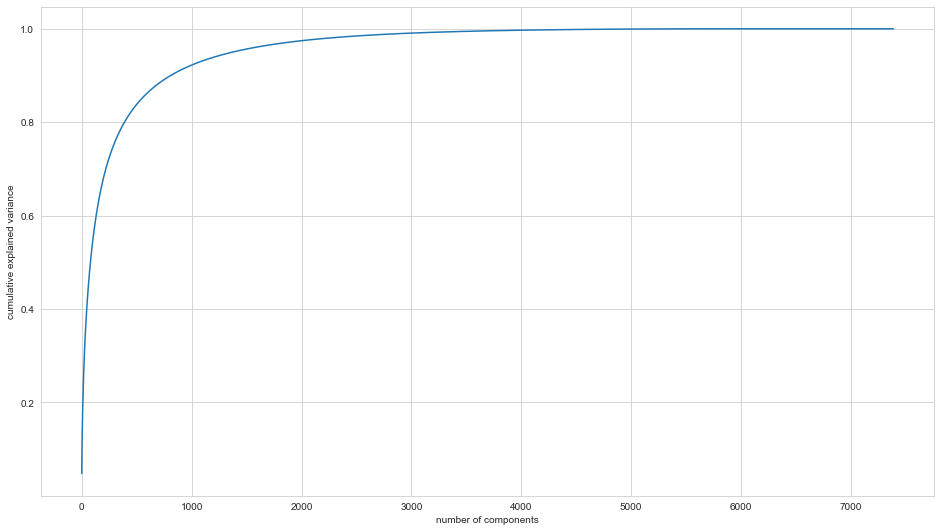

In [577]:
# sns.set_style('whitegrid')

# pca = PCA().fit(X_train)

# plt.figure(figsize=(16, 9))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');

Choose number of component to be 1000

In [648]:
pca = PCA(n_components=1000)
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [649]:
X_pca

array([[ 5.43156945e-01, -9.24767949e-01,  3.37294433e-01, ...,
        -8.43053270e-02,  2.99610237e-02, -3.87458526e-02],
       [ 7.82314092e-01,  1.49170015e+00, -8.45062834e-01, ...,
        -2.52079437e-02,  2.61694806e-02, -1.35738109e-02],
       [-6.08481062e-01, -9.11739001e-01, -5.60491246e-01, ...,
         1.28898292e-02,  9.44162840e-02, -5.87811918e-02],
       ...,
       [-6.26818776e-01, -8.90535669e-01, -5.19995862e-01, ...,
        -2.27024665e-02, -6.26354289e-02,  3.72570722e-02],
       [-4.05547106e-01,  2.71915419e-01, -1.71433282e-01, ...,
        -9.81340687e-03, -6.71050752e-02,  3.35630967e-02],
       [-2.76753898e-01, -2.45819820e-01, -2.44263419e-02, ...,
        -2.36027640e-02,  1.10315762e-03,  1.78608929e-02]])

In [650]:
X_test_pca

array([[ 2.15289814, -0.70316354,  0.58468012, ...,  0.00786962,
        -0.01381967, -0.02703577],
       [-1.09504415,  0.1177557 ,  0.47071065, ..., -0.010809  ,
        -0.01743174,  0.02517218],
       [-0.62697815, -0.91644317, -0.57570393, ..., -0.07086282,
         0.05516319,  0.01034765],
       ...,
       [-1.38316562,  1.28860209,  0.60771319, ..., -0.0241468 ,
        -0.02328939,  0.02253235],
       [-1.33704138,  0.03106348,  0.29131577, ..., -0.06489257,
        -0.05755866, -0.06145297],
       [-1.13649696, -0.05063097, -0.0678426 , ..., -0.07910368,
         0.05293108,  0.029262  ]])

# **Train Test Split**

In [606]:
df_dataset_cut = df_dataset.iloc[:, 10:1011]

In [607]:
y = df_dataset_cut['new_product_score'].to_numpy()
X = df_dataset_cut.iloc[:, 1:]

In [608]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [609]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (16044, 1000)
y_train shape:  (16044,)
X_test shape:  (4011, 1000)
y_test shape:  (4011,)


<AxesSubplot:ylabel='count'>

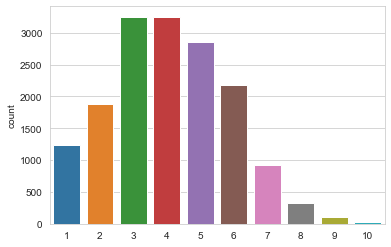

In [613]:
sns.countplot(y_train)

<AxesSubplot:ylabel='count'>

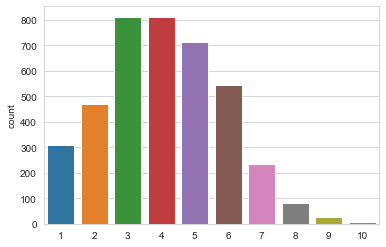

In [614]:
sns.countplot(y_test)

## **RANDOM FOREST**

In [611]:
import time
start_time = time.time()

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

### **Model**

In [654]:
forest_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=100)
forest_clf.fit(X_pca, y_train)

RandomForestClassifier(max_depth=100)

### **Predict**

In [655]:
# Predict on training set
forest_train_predict = forest_clf.predict(X_pca)
print('Accuracy:', accuracy_score(y_train, forest_train_predict))

Accuracy: 0.9879082523061581


In [656]:
# Predict on test set
forest_test_predict = forest_clf.predict(X_test_pca)
print('Accuracy:', accuracy_score(y_test, forest_test_predict))

Accuracy: 0.7220144602343556


### **Gridsearch**

### **Confusion maxtrix**

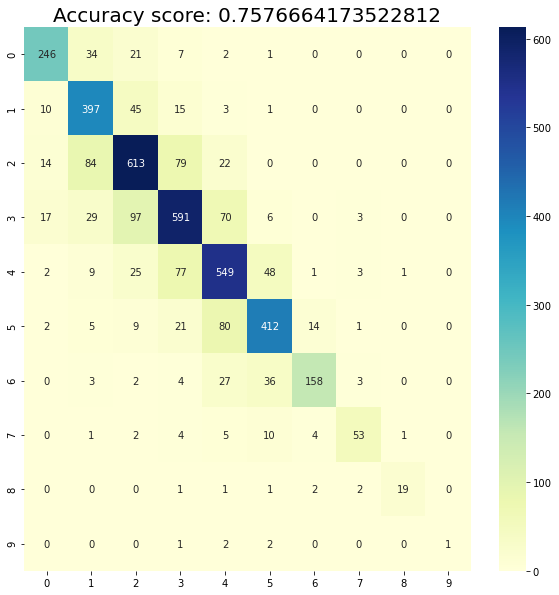

In [551]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, forest_test_predict), cmap="YlGnBu", annot=True, fmt="d")
#            xticklabels=,
#            yticklabels=['1', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.title(f'Accuracy score: {accuracy_score(y_test, forest_test_predict)}', fontsize=20)
plt.show()

## **SVM**

In [560]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [663]:
clf = SVC(kernel='rbf', C=10)
clf.fit(X_pca, y_train)

SVC(C=10)

### **Predict**

In [664]:
# Predict on training set
svm_train_predict = clf.predict(X_pca)
print('Accuracy:', accuracy_score(y_train, forest_train_predict))

Accuracy: 0.9879082523061581


In [665]:
# Predict on test set
svm_test_predict = clf.predict(X_test_pca)
print('Accuracy:', accuracy_score(y_test, forest_test_predict))

Accuracy: 0.7220144602343556


### **Confusion matrix**

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, svm_test_predict), cmap="YlGnBu", annot=True, fmt="d")
#            xticklabels=,
#            yticklabels=['1', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.title(f'Accuracy score: {accuracy_score(y_test, svm_test_predict)}', fontsize=20)
plt.show()

# **XGBoost**

In [657]:
import xgboost as xgb

In [660]:
xgbc = xgb.XGBClassifier(objective="multi:softmax",
                                learning_rate=0.08,
                                max_depth=6,
                                subsample=0.8,
                                colsample_bytree=0.8,
                                reg_alpha=8,
                                n_estimators=600,
                                reg_lambda=2)

In [659]:
# prep_xgb_pipeline = Pipeline(steps=[
#     ("hog_transform", hogger),
#     ("standard_scaler", StandardScaler())
# ])

# xgb_pipeline = Pipeline(steps=[
#     ("hog_transform", hogger),
#     ("standard_scaler", StandardScaler()),
#     ("xgb", xgbc)
# ])

In [661]:
eval_set = [(X_pca, y_train), (X_test_pca, y_test)]
xgbc.fit(X_pca, y_train, 
         eval_metric="merror", 
         eval_set = [(X_pca, y_train), (X_test_pca, y_test)], 
         early_stopping_rounds=50, 
         verbose=True)
evals_result = clf.evals_result()

[0]	validation_0-merror:0.44415	validation_1-merror:0.49389
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.40769	validation_1-merror:0.46447
[2]	validation_0-merror:0.37572	validation_1-merror:0.45126
[3]	validation_0-merror:0.34542	validation_1-merror:0.43480
[4]	validation_0-merror:0.33215	validation_1-merror:0.41710
[5]	validation_0-merror:0.31875	validation_1-merror:0.40738
[6]	validation_0-merror:0.31046	validation_1-merror:0.40040
[7]	validation_0-merror:0.30535	validation_1-merror:0.39865
[8]	validation_0-merror:0.29407	validation_1-merror:0.39541
[9]	validation_0-merror:0.28459	validation_1-merror:0.39267
[10]	validation_0-merror:0.27736	validation_1-merror:0.38993
[11]	validation_0-merror:0.27362	validation_1-merror:0.38519
[12]	validation_0-merror:0.26776	validation_1-merror:0.38494
[13]	validation_0-merror:0.26328	validation_1-merror:0

[132]	validation_0-merror:0.04114	validation_1-merror:0.26976
[133]	validation_0-merror:0.04101	validation_1-merror:0.27051
[134]	validation_0-merror:0.04064	validation_1-merror:0.26976
[135]	validation_0-merror:0.03995	validation_1-merror:0.26976
[136]	validation_0-merror:0.03945	validation_1-merror:0.26976
[137]	validation_0-merror:0.03939	validation_1-merror:0.27026
[138]	validation_0-merror:0.03927	validation_1-merror:0.26976
[139]	validation_0-merror:0.03858	validation_1-merror:0.26976
[140]	validation_0-merror:0.03827	validation_1-merror:0.26901
[141]	validation_0-merror:0.03808	validation_1-merror:0.26926
[142]	validation_0-merror:0.03777	validation_1-merror:0.26901
[143]	validation_0-merror:0.03727	validation_1-merror:0.26976
[144]	validation_0-merror:0.03690	validation_1-merror:0.26901
[145]	validation_0-merror:0.03665	validation_1-merror:0.26926
[146]	validation_0-merror:0.03653	validation_1-merror:0.26901
[147]	validation_0-merror:0.03603	validation_1-merror:0.26926
[148]	va

[265]	validation_0-merror:0.01714	validation_1-merror:0.25929
[266]	validation_0-merror:0.01726	validation_1-merror:0.25904
[267]	validation_0-merror:0.01726	validation_1-merror:0.25929
[268]	validation_0-merror:0.01726	validation_1-merror:0.25979
[269]	validation_0-merror:0.01726	validation_1-merror:0.25879
[270]	validation_0-merror:0.01714	validation_1-merror:0.25979
[271]	validation_0-merror:0.01702	validation_1-merror:0.25979
[272]	validation_0-merror:0.01702	validation_1-merror:0.25954
[273]	validation_0-merror:0.01695	validation_1-merror:0.25979
[274]	validation_0-merror:0.01689	validation_1-merror:0.25929
[275]	validation_0-merror:0.01677	validation_1-merror:0.25904
[276]	validation_0-merror:0.01677	validation_1-merror:0.25854
[277]	validation_0-merror:0.01689	validation_1-merror:0.25929
[278]	validation_0-merror:0.01664	validation_1-merror:0.25904
[279]	validation_0-merror:0.01664	validation_1-merror:0.25854
[280]	validation_0-merror:0.01658	validation_1-merror:0.25829
[281]	va

[398]	validation_0-merror:0.01384	validation_1-merror:0.24931
[399]	validation_0-merror:0.01384	validation_1-merror:0.25081
[400]	validation_0-merror:0.01384	validation_1-merror:0.25031
[401]	validation_0-merror:0.01378	validation_1-merror:0.24981
[402]	validation_0-merror:0.01384	validation_1-merror:0.25006
[403]	validation_0-merror:0.01378	validation_1-merror:0.25006
[404]	validation_0-merror:0.01378	validation_1-merror:0.25106
[405]	validation_0-merror:0.01378	validation_1-merror:0.25031
[406]	validation_0-merror:0.01378	validation_1-merror:0.25031
[407]	validation_0-merror:0.01378	validation_1-merror:0.25031
[408]	validation_0-merror:0.01371	validation_1-merror:0.25031
[409]	validation_0-merror:0.01359	validation_1-merror:0.25006
[410]	validation_0-merror:0.01359	validation_1-merror:0.25031
[411]	validation_0-merror:0.01359	validation_1-merror:0.25006
[412]	validation_0-merror:0.01359	validation_1-merror:0.25031
[413]	validation_0-merror:0.01359	validation_1-merror:0.25031
[414]	va

AttributeError: 'SVC' object has no attribute 'evals_result'

In [662]:
xgb_pred = xgbc.predict(X_test_pca)
print('Accuracy:', accuracy_score(y_test, xgb_pred))

Accuracy: 0.7511842433308402


# **Reduce number of class**

In [ ]:
df_all

# **Pickle file**

In [ ]:
import pickle

pickle.dump(best_svc, open('svc_c10_rbf_902_bestscore.pkl', 'wb'))

# **Recommendation: KNN**

In [668]:
from sklearn.neighbors import NearestNeighbors

In [739]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)

In [756]:
test = df_dataset.iloc[90, 11:].to_numpy(dtype= np.uint8)
test

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [757]:
distances, indices = nbrs.kneighbors([test])
distances, indices

(array([[0., 0., 0., 0., 0.]]), array([[ 6202, 15534, 15412,  2790, 10057]]))

In [758]:
distances

array([[0., 0., 0., 0., 0.]])

In [759]:
indices

array([[ 6202, 15534, 15412,  2790, 10057]])

In [760]:
location = indices.tolist()[0]

In [761]:
location

[6202, 15534, 15412, 2790, 10057]

In [764]:
df_dataset.iloc[90,:]

cat_name                                            Makeup                                                                           
subcat_name                                         Eye Shadow                                                                       
product_url                                         https://www.ewg.org/skindeep/products/837819-Alima_Pure_Pressed_Eyeshadow_Gamine/
product_brand                                       Alima Pure                                                                       
product_name                                        Pressed Eyeshadow, Gamine                                                        
                                                              ...                                                                    
TDI OXIDIZED MICROCRYSTALLINE WAX                   0                                                                                
ASTILBE CHINENSIS ROOT EXTRACT                      0         

In [763]:
df_dataset.iloc[location, :]

,cat_name,subcat_name,product_url,product_brand,product_name,product_score,product_img,ingredient_list,new_ing_list,new_ing_list_fixed,...,SALACIA CHINENSIS ROOT EXTRACT,KERATINOCYTE CONDITIONED MEDIA,ISOPENTYL CYCLOHEXYL ACETATE,MUCOR CIRCINELLOIDES GLYCERIDES,POTASSIUM OXIDIZED MICROCRYSTALLINE WAX,TDI OXIDIZED MICROCRYSTALLINE WAX,ASTILBE CHINENSIS ROOT EXTRACT,ASCORBYL METHOXYCINNAMATE,BIS-METHYLISOCYTOSINE HYDROGENATED POLYBUTADIENE,ALUMINUM MAGNESIUM OXIDE
15461,Makeup,Eye Shadow,https://www.ewg.org/skindeep/products/837822-Alima_Pure_Pressed_Eyeshadow_Icon/,Alima Pure,"Pressed Eyeshadow, Icon",3,https://static.ewg.org/skindeep_images/8378/837822.jpg,"Mica, Oryza Sativa (Rice) Powder, Squalane, Magnesium Stearate, Tocopherol, Benzyl Alcohol, Parfum*, Persea Gratissima (Avocado) Oil, Simmondsia Chinensis (Jojoba) Seed Oil, Dehydroacetic Acid , May Contain: CI 77891 (Titanium Dioxide), CI 77491 (Iron Oxide-Red), CI 77492 (Iron Oxide-Yellow), CI 77499 (Iron Oxide-Black), CI 77007 (Ultramarines), CI 77288 (Chromium Oxide), CI 77742 (Manganese Violet)","['MICA', 'ORYZA SATIVA GERM POWDER', 'SQUALANE', 'MAGNESIUM STEARATE', 'TOCOPHEROL', 'BENZYL ALCOHOL', 'PARFUM', 'PERSEA GRATISSIMA OIL', 'SIMMONDSIA CHINENSIS SEED OIL', 'DEHYDROACETIC ACID', 'COBALT TITANIUM OXIDE', 'IRON OXIDES', 'IRON OXIDES', 'IRON OXIDES', 'ULTRAMARINES', 'DICHROMIUM TRIOXIDE', 'MANGANESE DIOXIDE']","MICA, ORYZA SATIVA GERM POWDER, SQUALANE, MAGNESIUM STEARATE, TOCOPHEROL, BENZYL ALCOHOL, PARFUM, PERSEA GRATISSIMA OIL, SIMMONDSIA CHINENSIS SEED OIL, DEHYDROACETIC ACID, COBALT TITANIUM OXIDE, IRON OXIDES, IRON OXIDES, IRON OXIDES, ULTRAMARINES, DICHROMIUM TRIOXIDE, MANGANESE DIOXIDE",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15265,Makeup,Eye Shadow,https://www.ewg.org/skindeep/products/837818-Alima_Pure_Pressed_Eyeshadow_Isla/,Alima Pure,"Pressed Eyeshadow, Isla",3,https://static.ewg.org/skindeep_images/8378/837818.jpg,"Mica, Oryza Sativa (Rice) Powder, Squalane, Magnesium Stearate, Tocopherol, Benzyl Alcohol, Parfum*, Persea Gratissima (Avocado) Oil, Simmondsia Chinensis (Jojoba) Seed Oil, Dehydroacetic Acid , May Contain: CI 77891 (Titanium Dioxide), CI 77491 (Iron Oxide-Red), CI 77492 (Iron Oxide-Yellow), CI 77499 (Iron Oxide-Black), CI 77007 (Ultramarines), CI 77288 (Chromium Oxide), CI 77742 (Manganese Violet)","['MICA', 'ORYZA SATIVA GERM POWDER', 'SQUALANE', 'MAGNESIUM STEARATE', 'TOCOPHEROL', 'BENZYL ALCOHOL', 'PARFUM', 'PERSEA GRATISSIMA OIL', 'SIMMONDSIA CHINENSIS SEED OIL', 'DEHYDROACETIC ACID', 'COBALT TITANIUM OXIDE', 'IRON OXIDES', 'IRON OXIDES', 'IRON OXIDES', 'ULTRAMARINES', 'DICHROMIUM TRIOXIDE', 'MANGANESE DIOXIDE']","MICA, ORYZA SATIVA GERM POWDER, SQUALANE, MAGNESIUM STEARATE, TOCOPHEROL, BENZYL ALCOHOL, PARFUM, PERSEA GRATISSIMA OIL, SIMMONDSIA CHINENSIS SEED OIL, DEHYDROACETIC ACID, COBALT TITANIUM OXIDE, IRON OXIDES, IRON OXIDES, IRON OXIDES, ULTRAMARINES, DICHROMIUM TRIOXIDE, MANGANESE DIOXIDE",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15160,Makeup,Eye Shadow,https://www.ewg.org/skindeep/products/837824-Alima_Pure_Pressed_Eyeshadow_Phantom/,Alima Pure,"Pressed Eyeshadow, Phantom",3,https://static.ewg.org/skindeep_images/8378/837824.jpg,"Mica, Oryza Sativa (Rice) Powder, Squalane, Magnesium Stearate, Tocopherol, Benzyl Alcohol, Parfum*, Persea Gratissima (Avocado) Oil, Simmondsia Chinensis (Jojoba) Seed Oil, Dehydroacetic Acid , May Contain: CI 77891 (Titanium Dioxide), CI 77491 (Iron Oxide-Red), CI 77492 (Iron Oxide-Yellow), CI 77499 (Iron Oxide-Black), CI 77007 (Ultramarines), CI 77288 (Chromium Oxide), CI 77742 (Manganese Violet)","['MICA', 'ORYZA SATIVA GERM POWDER', 'SQUALANE', 'MAGNESIUM STEARATE', 'TOCOPHEROL', 'BENZYL ALCOHOL', 'PARFUM', 'PERSEA GRATISSIMA OIL', 'SIMMONDSIA CHINENSIS SEED OIL', 'DEHYDROACETIC ACID', 'COBALT TITANIUM OXIDE', 'IRON OXIDES', 'IRON OXIDES', 'IRON OXIDES', 'ULTRAMARINES', 'DICHROMIUM TRIOXIDE', 'MANGANESE DIOXIDE']","MICA, ORYZA SATIVA GERM POWDER, SQUALANE, MAGNESIUM STEARATE, TOCOPHEROL, BE